In [22]:
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from numpy import array
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from numpy import expand_dims
from numpy import reshape
from numpy import load
from numpy import max
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
!python --version

Python 3.7.11


In [23]:
def extract_image(image):
  img1 = Image.open(image)
  img1 = img1.convert('RGB')
  pixels = asarray(img1)
  detector = MTCNN()
  f = detector.detect_faces(pixels)
  x1,y1,w,h = f[0]['box']
  x1, y1 = abs(x1), abs(y1)
  x2 = abs(x1+w)
  y2 = abs(y1+h)
  store_face = pixels[y1:y2,x1:x2]
  image1 = Image.fromarray(store_face,'RGB')
  image1 = image1.resize((160,160))
  face_array = asarray(image1)
  return face_array

In [24]:
#extracting embeddings
def extract_embeddings(model,face_pixels):
  face_pixels = face_pixels.astype('float32')
  mean = face_pixels.mean()
  std  = face_pixels.std()
  face_pixels = (face_pixels - mean)/std
  samples = expand_dims(face_pixels,axis=0)
  model.summary()
  yhat = model.predict(samples)
  return yhat[0]

In [25]:
#load data and reshape the image
Img = '1.jpg'
#plt.imshow(Img)
face = extract_image(Img)
testx = asarray(face)
testx = testx.reshape(-1,160,160,3)
print("Input test data shape: ",testx.shape)

Input test data shape:  (1, 160, 160, 3)


In [27]:
#find embeddings
model = load_model('facenet_keras.h5')
new_testx = list()
count=0
for test_pixels in testx:
  embeddings = extract_embeddings(model,test_pixels)
  new_testx.append(embeddings)
new_testx = asarray(new_testx)
print("Embedding found out:",new_testx)  
print("Input test embedding shape: ",new_testx.shape)

#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

Block17_6_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_6_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_6_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_6_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_6_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Block17_5_Activation[0][0]       
__________________________________________________________________________________________________
Block17_6_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_6_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_6_

Total params: 22,808,144
Trainable params: 22,779,312
Non-trainable params: 28,832
__________________________________________________________________________________________________
Embedding found out: [[ 0.4866427   0.74010885 -0.26893106  0.6626251  -1.8826461   2.427015
  -1.3166736  -0.0483096   0.41626963 -0.04052781  0.36257142  0.22970095
   0.36361563  0.10636739  0.2010747   1.2173867   0.5476648   1.4539899
   0.6905495   0.26341882 -0.37497753  0.33820263  2.144636   -0.4243855
   0.707872    1.0246146  -0.27916077 -0.68703794 -1.7434838  -1.0024041
  -1.2830979   0.010947   -0.20838653  0.3938612   2.4972005   0.74668777
   0.72679996  0.43568057  0.97586673  1.2703955   0.8069716   0.44090602
   1.1635965  -1.0779567  -0.09610989  0.04567486 -0.03184992 -0.4443213
   0.6757849   1.7377332   1.2213248  -0.6741587   1.4032923  -0.29766923
   1.5947623   1.0071504   0.45643452 -1.2101064   1.0445318  -0.7922839
   2.3134882  -0.295516    1.2160834   0.3877653   0.96119624 -1

In [28]:
data1 = load('Indian-celeb-dataset.npz')
train_x,train_y = data1['arr_0'],data1['arr_1']

In [29]:
train_y.shape

(1538,)

In [30]:
data = load('Indian-celeb-embeddings.npz')
trainx,trainy= data['arr_0'],data['arr_1']

In [31]:
trainx,trainy

(array([[ 0.58666205,  0.43388316, -0.15087289, ...,  0.743563  ,
          0.4148301 ,  0.2843331 ],
        [ 0.3982225 ,  0.5820154 , -0.31363434, ...,  1.6621352 ,
          0.8496292 ,  0.09277551],
        [ 0.4691719 , -0.48129895,  0.03672205, ...,  0.6987616 ,
          0.19578196,  0.31208146],
        ...,
        [ 0.1923241 , -1.5164121 ,  0.84998864, ...,  0.46763298,
          0.52679384,  1.7669692 ],
        [ 0.2709    , -1.090874  ,  0.48614445, ...,  1.098123  ,
          0.30654818,  1.6601373 ],
        [ 0.8757764 , -1.2699177 ,  0.4130425 , ...,  0.43943492,
         -0.05928362,  1.7137269 ]], dtype=float32),
 array(['Yami_Gautam', 'Yami_Gautam', 'Yami_Gautam', ...,
        'Tamannaah_Bhatia', 'Tamannaah_Bhatia', 'Tamannaah_Bhatia'],
       dtype='<U20'))

In [32]:
print("Loaded data: Train=%d , Test=%d"%(trainx.shape[0],new_testx.shape[0]))

Loaded data: Train=1538 , Test=1


In [33]:
#normalize the input data
in_encode = Normalizer(norm='l2')
trainx = in_encode.transform(trainx)
new_testx = in_encode.transform(new_testx)
trainx,new_testx

(array([[ 0.05429576,  0.04015602, -0.01396333, ...,  0.06881699,
          0.03839266,  0.02631512],
        [ 0.03264886,  0.04771739, -0.02571377, ...,  0.13627261,
          0.0696581 ,  0.00760634],
        [ 0.04370121, -0.04483079,  0.00342049, ...,  0.06508643,
          0.01823619,  0.02906896],
        ...,
        [ 0.0185566 , -0.1463127 ,  0.08201209, ...,  0.04512009,
          0.05082829,  0.17048799],
        [ 0.02506006, -0.10091311,  0.0449716 , ...,  0.10158369,
          0.02835775,  0.15357377],
        [ 0.0830779 , -0.12046693,  0.03918204, ...,  0.04168567,
         -0.00562376,  0.16256756]], dtype=float32),
 array([[ 0.04477814,  0.06810068, -0.02474553,  0.06097106, -0.17323057,
          0.22332036, -0.12115295, -0.00444518,  0.03830281, -0.00372914,
          0.0333618 ,  0.0211358 ,  0.03345788,  0.00978733,  0.01850177,
          0.11201712,  0.05039306,  0.13378802,  0.0635405 ,  0.02423833,
         -0.03450334,  0.03111952,  0.19733742, -0.03904958,  

In [34]:
#create a label vector
out_encode = LabelEncoder()
out_encode.fit(trainy)
trainy = out_encode.transform(trainy)

In [35]:
trainy.shape

(1538,)

In [36]:
#define svm classifier model 
model =SVC(kernel='linear', probability=True)
model.fit(trainx,trainy)


SVC(kernel='linear', probability=True)

In [39]:
#predict
predict_train = model.predict(trainx)
predict_train

array([98, 98, 98, ..., 89, 89, 89])

In [40]:
predict_test = model.predict(new_testx)
predict_test

array([92])

In [41]:
#get the confidence score
probability = model.predict_proba(new_testx)
confidence = max(probability)

In [44]:
#Accuracy
acc_train = accuracy_score(trainy,predict_train)
acc_train

C:\Users\Gamerulzz\miniconda3\envs\projectP37\lib\site-packages\sklearn\metrics\_classification.py:208: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

Text(0.5, 0, 'Predicted Data')

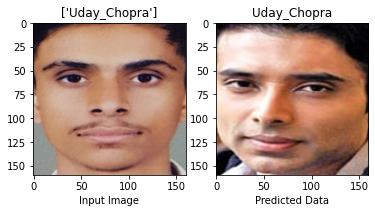

In [43]:
#display
trainy_list = list(trainy)
p=int(predict_test)
if p in trainy_list:
  val = trainy_list.index(p)
#display Input Image
plt.subplot(1,2,1)
plt.imshow(face)
predict_test = out_encode.inverse_transform(predict_test)
plt.title(predict_test)
plt.xlabel("Input Image")
#display Predicated data
plt.subplot(1,2,2)
plt.imshow(train_x[val])
trainy = out_encode.inverse_transform(trainy)
plt.title(trainy[val])
plt.xlabel("Predicted Data")